In [1]:
import plotly.express as px
import nbformat
df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df, y='pop', x='country', text_auto='.2s',
            title="Default: various text sizes, positions and angles")
fig.show()

In [2]:
import plotly.express as px

df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df, y='pop', x='country', text_auto='.2s',
            title="Controlled text sizes, positions and angles")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

y_saving = [1.3586, 2.2623000000000002, 4.9821999999999997, 6.5096999999999996,
            7.4812000000000003, 7.5133000000000001, 15.2148, 17.520499999999998
            ]
y_net_worth = [93453.919999999998, 81666.570000000007, 69889.619999999995,
               78381.529999999999, 141395.29999999999, 92969.020000000004,
               66090.179999999993, 122379.3]
x = ['Japan', 'United Kingdom', 'Canada', 'Netherlands',
     'United States', 'Belgium', 'Sweden', 'Switzerland']


# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=y_saving,
    y=x,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Household savings, percentage of household disposable income',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=y_net_worth, y=x,
    mode='lines+markers',
    line_color='rgb(128, 0, 128)',
    name='Household net worth, Million USD/capita',
), 1, 2)

fig.update_layout(
    title='Household savings & net worth for eight OECD countries',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=25000,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []

y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)

# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn - 20000,
                            text='{:,}'.format(ydn) + 'M',
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd + 3,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.2, y=-0.109,
                        text='OECD "' +
                             '(2015), Household savings (indicator), ' +
                             'Household net worth (indicator). doi: ' +
                             '10.1787/cfc6f499-en (Accessed on 05 June 2015)',
                        font=dict(family='Arial', size=10, color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

#### Best Model

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


from sklearn.feature_extraction.text import TfidfVectorizer

import swifter

from joblib import dump, load

c:\Users\lgome\.conda\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [5]:
best_model = load('best_model.joblib')

In [6]:
X_train_clean = pd.read_excel("../data/cat_345_clean_con_lema.xlsx")
X_test_clean = pd.read_excel("../data/cat_345_clean_con_lema_test.xlsx")
vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    max_df=0.5,
    min_df=5,
    stop_words=stopwords.words('spanish'),
    tokenizer=lambda text: word_tokenize(text, language="spanish")
)
X_train_TFID = vectorizer.fit_transform(X_train_clean['texto_limpio'])
X_test_TFID = vectorizer.transform(X_test_clean['texto_limpio'])

c:\Users\lgome\.conda\envs\myenv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



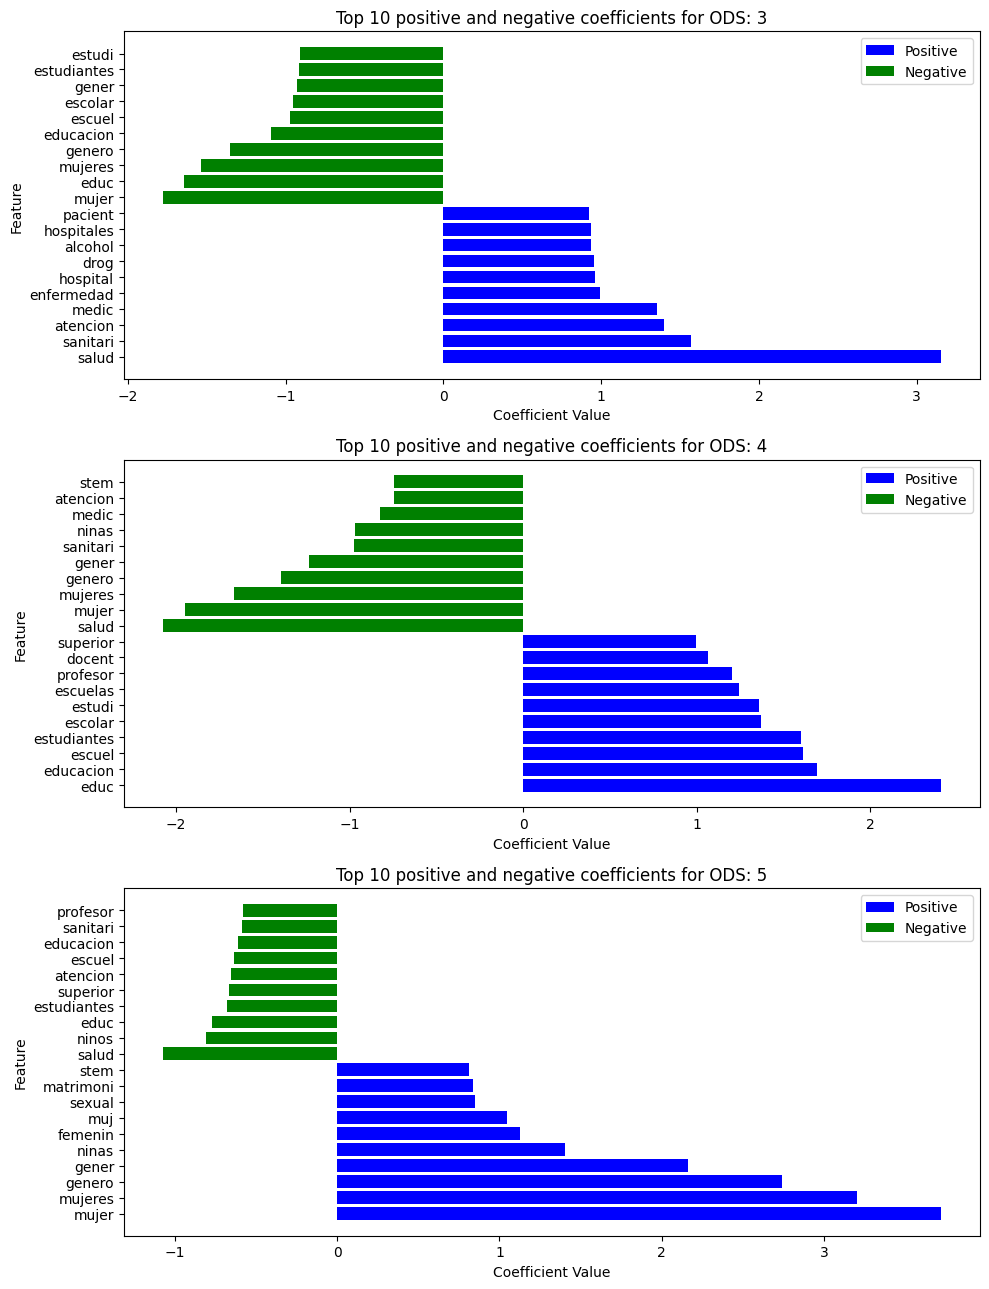

In [7]:
from joblib import load
import pandas as pd
import matplotlib.pyplot as plt

# Load the model
best_model = load('best_model.joblib')

fig, axs = plt.subplots(nrows=3, figsize=(10, 13))

for i in range(3):
    coefficients_df = pd.DataFrame({'Feature': vectorizer.get_feature_names_out(), 'Coefficient': best_model.coef_[i]})

    top_positive = coefficients_df.sort_values(by='Coefficient', ascending=False).head(10)
    top_negative = coefficients_df.sort_values(by='Coefficient', ascending=True).head(10)

    axs[i].barh(top_positive['Feature'], top_positive['Coefficient'], color='blue')
    axs[i].barh(top_negative['Feature'], top_negative['Coefficient'], color='green')
    axs[i].set_title(f"Top 10 positive and negative coefficients for ODS: {i+3}")
    axs[i].set_xlabel("Coefficient Value")
    axs[i].set_ylabel("Feature")
    axs[i].legend(['Positive', 'Negative'])

plt.tight_layout()
plt.show()